In [448]:
#


New Section

In [449]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [450]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [451]:
!pwd

/content


In [452]:
import glob

# List all the files in the directory
files = glob.glob('/content/drive/MyDrive/data/*.csv')

# Read each file individually
for file in files:
    df = pd.read_csv(file)

Show top 5

In [453]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [454]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

Dataset information

collumn details

3. Data checks to perdorm
check missing value and duplicate
check data tupe
check the numner of unique value of each collumn
check statistics of data set
check avarious catagodies present in rhe diffrent catagorical column

Remove space with underscore

In [455]:
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('/', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')



In [456]:
df.columns

Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course', 'math_score', 'reading_score',
       'writing_score'],
      dtype='object')

3.1 check missing value

In [457]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

no missing value

Check duplicate

In [458]:
df.duplicated().sum()


0

No duplicate

In [459]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3.2 Checkinhg the number og unique values of each column

In [460]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Check statistics of data set

In [461]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


This data provides insights into the scores of a group of people in three subjects: math, reading, and writing. Here's what the information means:

1. **Count:** There are 1000 people in the group.
2. **Mean:** On average, the math score is 66.089, reading score is 69.169, and writing score is 68.054.
3. **Standard Deviation (std):** The scores vary around the mean by approximately 15 points for math, 14.6 points for reading, and 15.2 points for writing.
4. **Minimum (min):** The lowest scores recorded are 0.0 for math, 17.0 for reading, and 10.0 for writing.
5. **25%, 50%, 75% (Percentiles):**
   - 25% of people scored 57.0 or lower in math, 59.0 or lower in reading, and 57.75 or lower in writing.
   - 50% of people scored 66.0 or lower in math, 70.0 or lower in reading, and 69.0 or lower in writing.
   - 75% of people scored 77.0 or lower in math, 79.0 or lower in reading, and 79.0 or lower in writing.
6. **Maximum (max):** The highest scores recorded are 100.0 for math, 100.0 for reading, and 100.0 for writing.

In summary, this data provides a snapshot of the distribution of scores, showing the average, variability, and the range of scores in the three subjects.

3.7 Explode Data *Big font

In [462]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group_b,bachelor's_degree,standard,none,72,72,74
1,female,group_c,some_college,standard,completed,69,90,88
2,female,group_b,master's_degree,standard,none,90,95,93
3,male,group_a,associate's_degree,free/reduced,none,47,57,44
4,male,group_c,some_college,standard,none,76,78,75


In [463]:
df.columns.tolist()


['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [464]:
columns_of_categories = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

for column in columns_of_categories:
    print(f"Categories in '{column}' variable:", end=" ")
    print(df[column].unique())

Categories in 'gender' variable: ['female' 'male']
Categories in 'race_ethnicity' variable: ['group_b' 'group_c' 'group_a' 'group_d' 'group_e']
Categories in 'parental_level_of_education' variable: ["bachelor's_degree" 'some_college' "master's_degree" "associate's_degree"
 'high_school' 'some_high_school']
Categories in 'lunch' variable: ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable: ['none' 'completed']


In [465]:
# Define numerical and categorical columns
numeric_features = df.select_dtypes(exclude='object').columns
categorical_features = df.select_dtypes(include='object').columns

# Print columns
print(f"We have {len(numeric_features)} numerical features: {list(numeric_features)}")
print(f"We have {len(categorical_features)} categorical features: {list(categorical_features)}")


We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [466]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group_b,bachelor's_degree,standard,none,72,72,74
1,female,group_c,some_college,standard,completed,69,90,88
2,female,group_b,master's_degree,standard,none,90,95,93
3,male,group_a,associate's_degree,free/reduced,none,47,57,44
4,male,group_c,some_college,standard,none,76,78,75


3.8 Adding columns for "Total Score" and "Average"


In [467]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group_b,bachelor's_degree,standard,none,72,72,74,218,72.666667
1,female,group_c,some_college,standard,completed,69,90,88,247,82.333333
2,female,group_b,master's_degree,standard,none,90,95,93,278,92.666667
3,male,group_a,associate's_degree,free/reduced,none,47,57,44,148,49.333333
4,male,group_c,some_college,standard,none,76,78,75,229,76.333333


In [468]:
print(f"Number of students with full marks in Maths: {df[df['math_score'] == 100]['average'].count()}")
print(f"Number of students with full marks in Writing: {df[df['writing_score'] == 100]['average'].count()}")
print(f"Number of students with full marks in Reading: {df[df['reading_score'] == 100]['average'].count()}")


Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [469]:
print(f"Number of students with less than 20 marks in Maths: {df[df['math_score'] <= 20]['average'].count()}")
print(f"Number of students with less than 20 marks in Writing: {df[df['writing_score'] <= 20]['average'].count()}")
print(f"Number of students with less than 20 marks in Reading: {df[df['reading_score'] <= 20]['average'].count()}")


Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


**Insights:**

1. **Strengths:**
   - Mathematics: 7 students achieved full marks, showcasing strong proficiency.
   - Writing: 14 students scored perfectly, indicating a commendable performance.
   - Reading: 17 students attained full marks, highlighting excellence in comprehension.

2. **Areas for Improvement:**
   - Mathematics: 4 students scored less than 20, indicating a need for focus and improvement.
   - Writing: 3 students scored less than 20, suggesting room for enhancement.
   - Reading: Only 1 student scored less than 20, showcasing a relatively strong performance overall.

Visualization

histogram
Karnel Distribution Function (KDE)


1. Average Scores Distribution by Gender:

Visualizing the distribution of average scores with a histogram. The left plot shows the overall distribution, while the right plot distinguishes by gender.

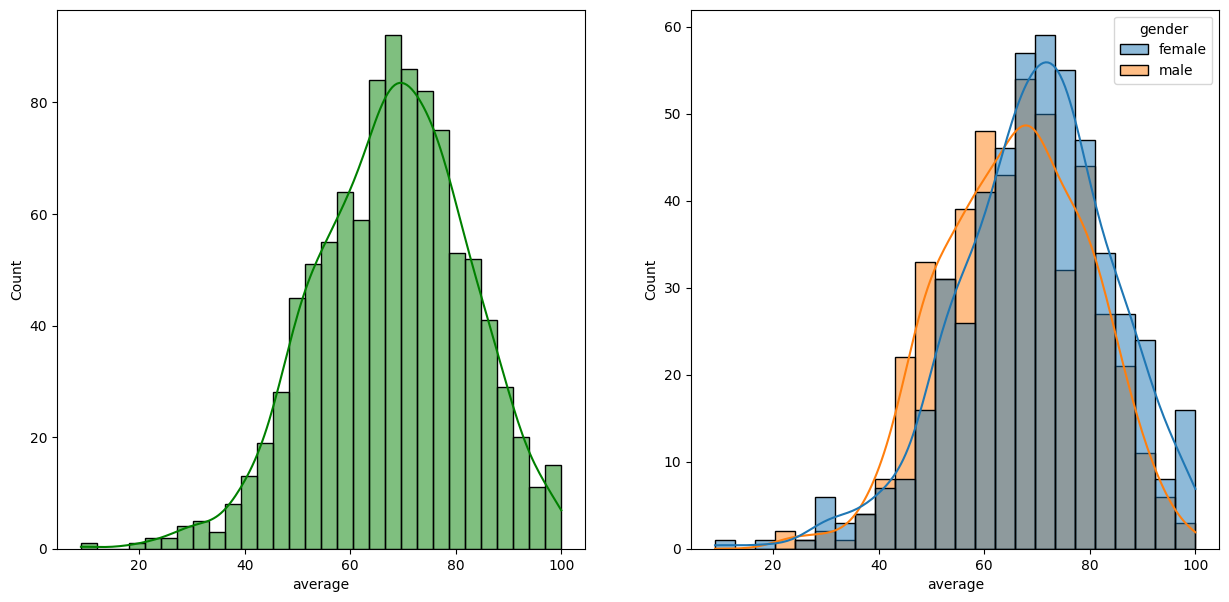

In [470]:
# Histograms of Average Scores

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Left subplot: Overall distribution
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')

# Right subplot: Distribution with gender differentiation
plt.subplot(122)
sns.histplot(data=df,x='average',kde=True,hue='gender')
plt.show()

2. Total Scores Distribution by Gender:

Examining the distribution of total scores through a histogram. The left plot provides an overall perspective, while the right plot differentiates by gender.

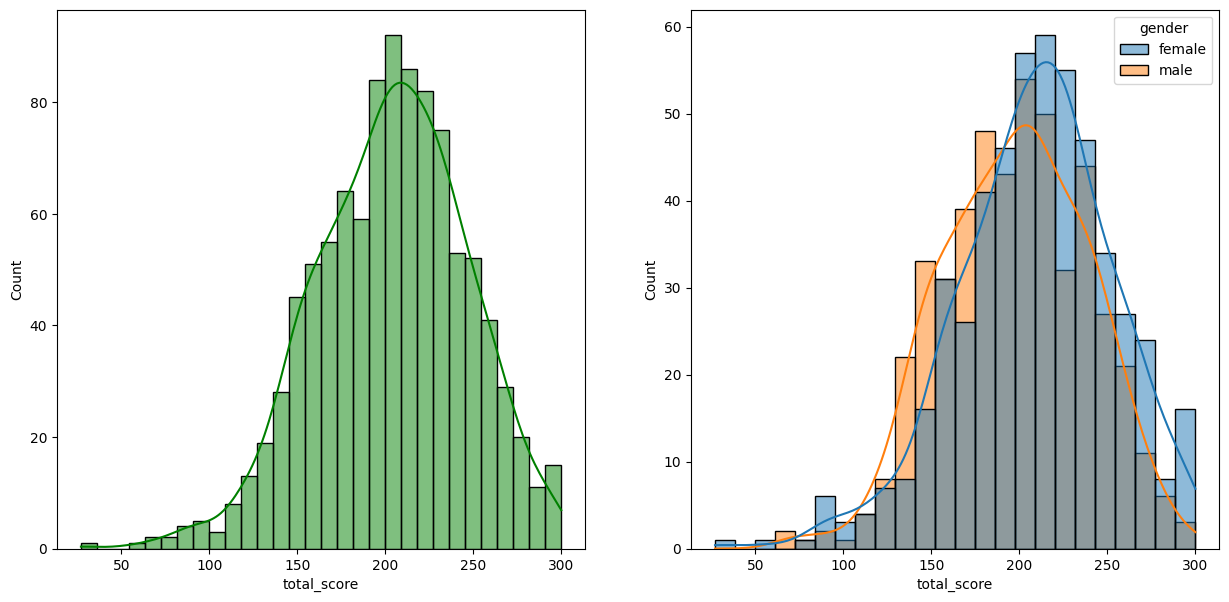

In [471]:
# Histograms of Total Scores

fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# Left subplot: Overall distribution
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')

# Right subplot: Distribution with gender differentiation
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

3. Average Scores Distribution by Lunch Type:

Exploring the distribution of average scores with histograms, segmented by lunch type. The three plots depict the overall distribution, female students, and male students.

In [472]:
import warnings


<ipython-input-473-93892a326866>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-473-93892a326866>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-473-93892a326866>:14: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


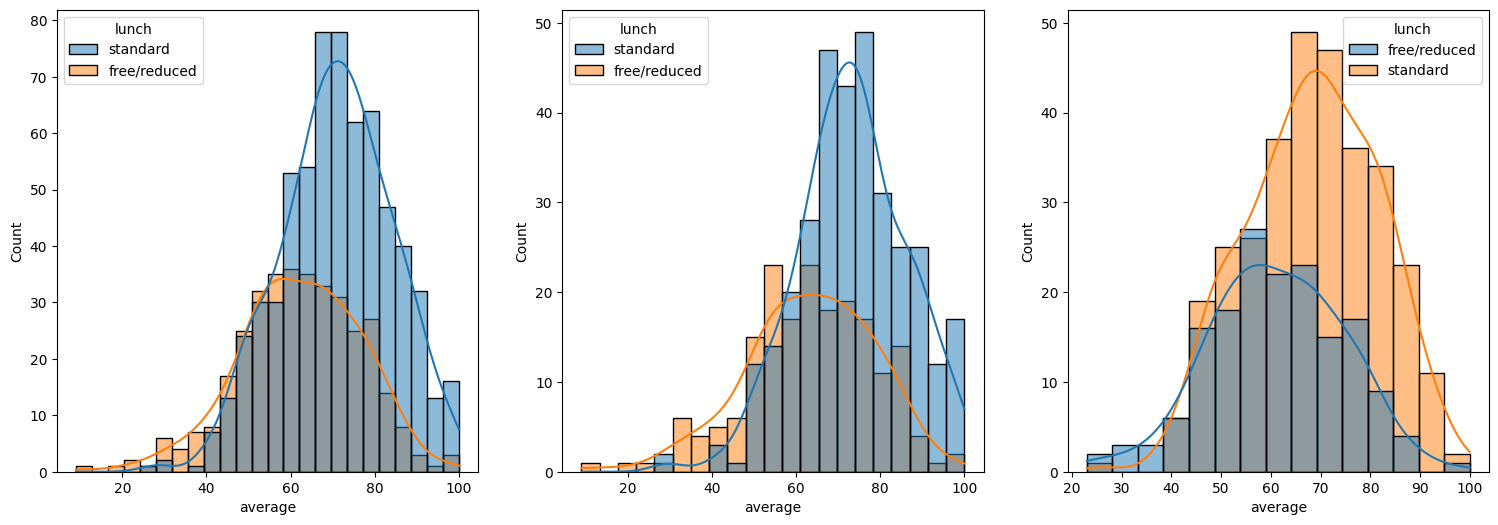

In [473]:
# Average Scores Distribution by Lunch and Gender

plt.subplots(1,3,figsize=(25,6))

# Left subplot: Overall distribution
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')

# Middle subplot: Female students' distribution
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')

# Right subplot: Male students' distribution
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()



4. Average Scores Distribution by Parental Education:

Analyzing the distribution of average scores with histograms, categorized by parental level of education. The plots illustrate the overall distribution, male students, and female students.

<ipython-input-474-52b8754c0d77>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


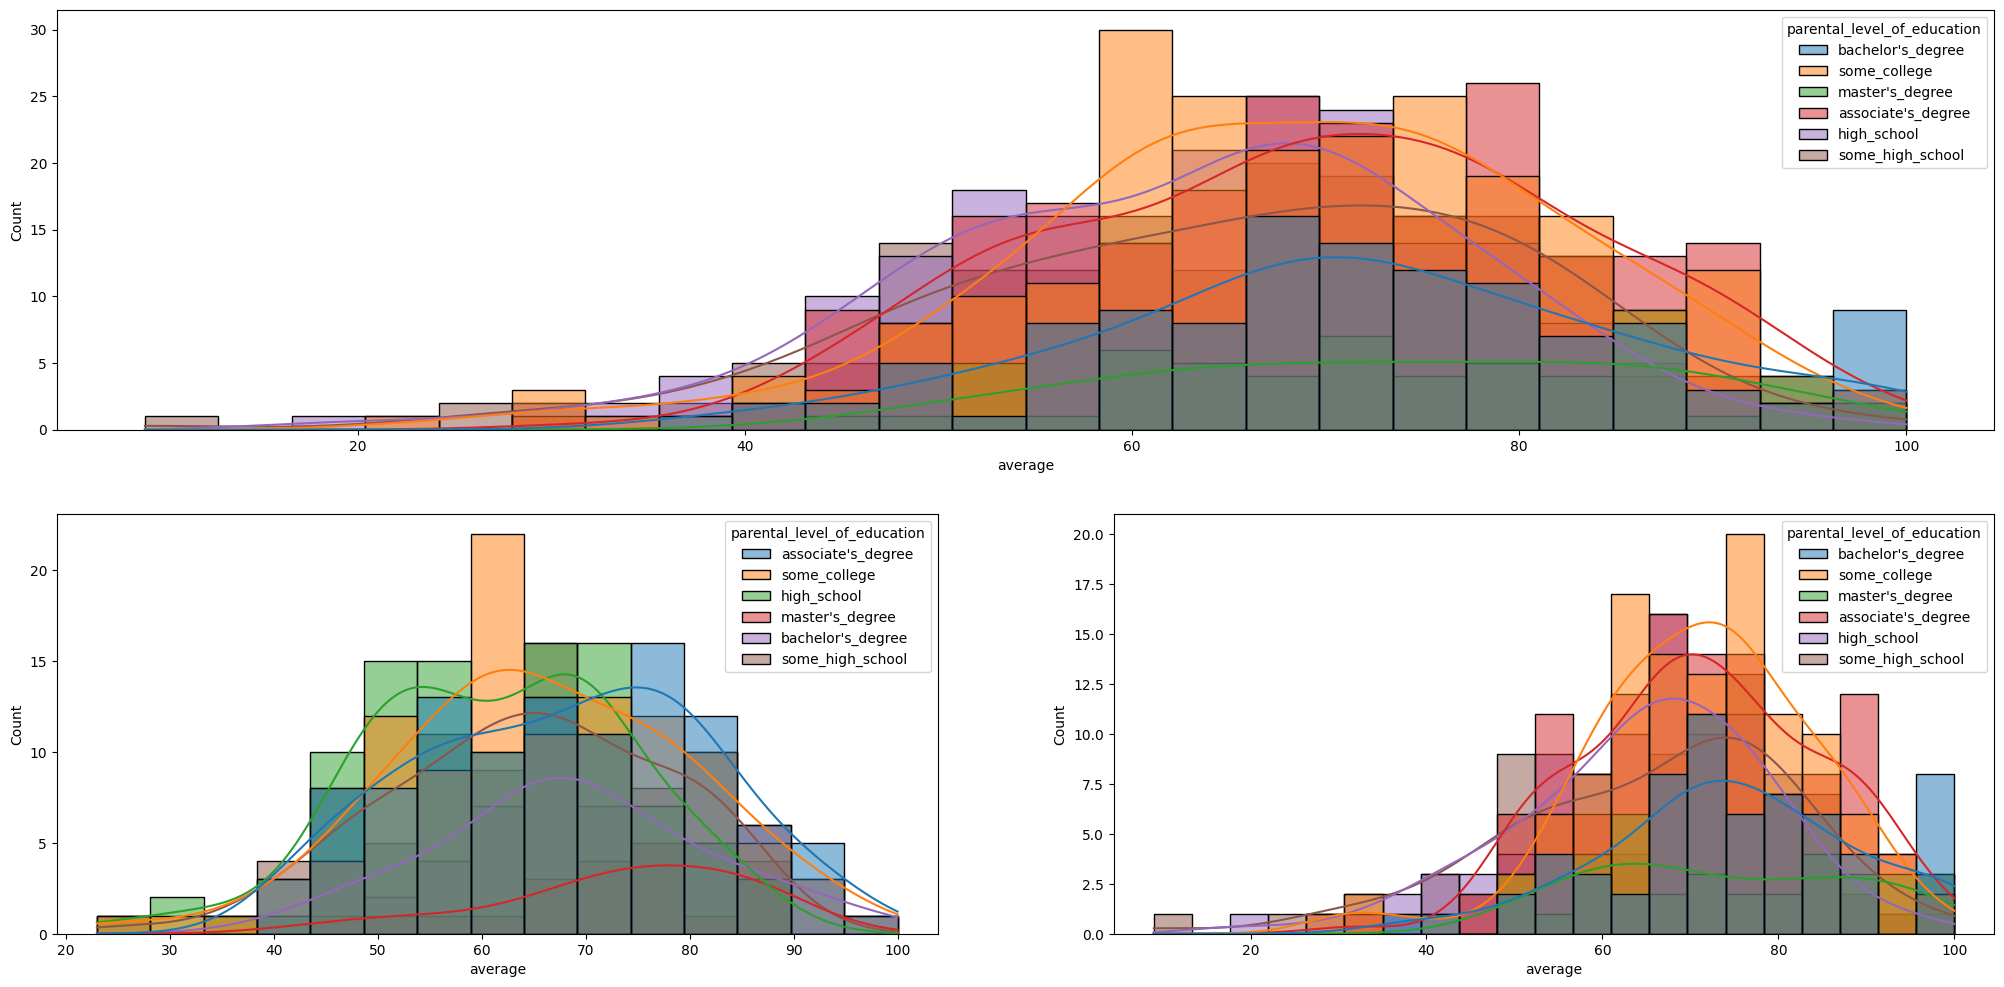

In [474]:
# Average Scores Distribution by Parental Education and Gender
plt.subplots(2, 2, figsize=(25, 12))

# First subplot: Overall distribution
plt.subplot(211)
ax = sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')

# Second subplot: Male students' distribution
plt.subplot(223)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')

# Third subplot: Female students' distribution
plt.subplot(224)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

5. Average Scores Distribution by Race/Ethnicity:

Examining the distribution of average scores using histograms, segmented by race/ethnicity. The three plots represent the overall distribution, female students, and male students.

<ipython-input-475-cfe53b56d496>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(211)


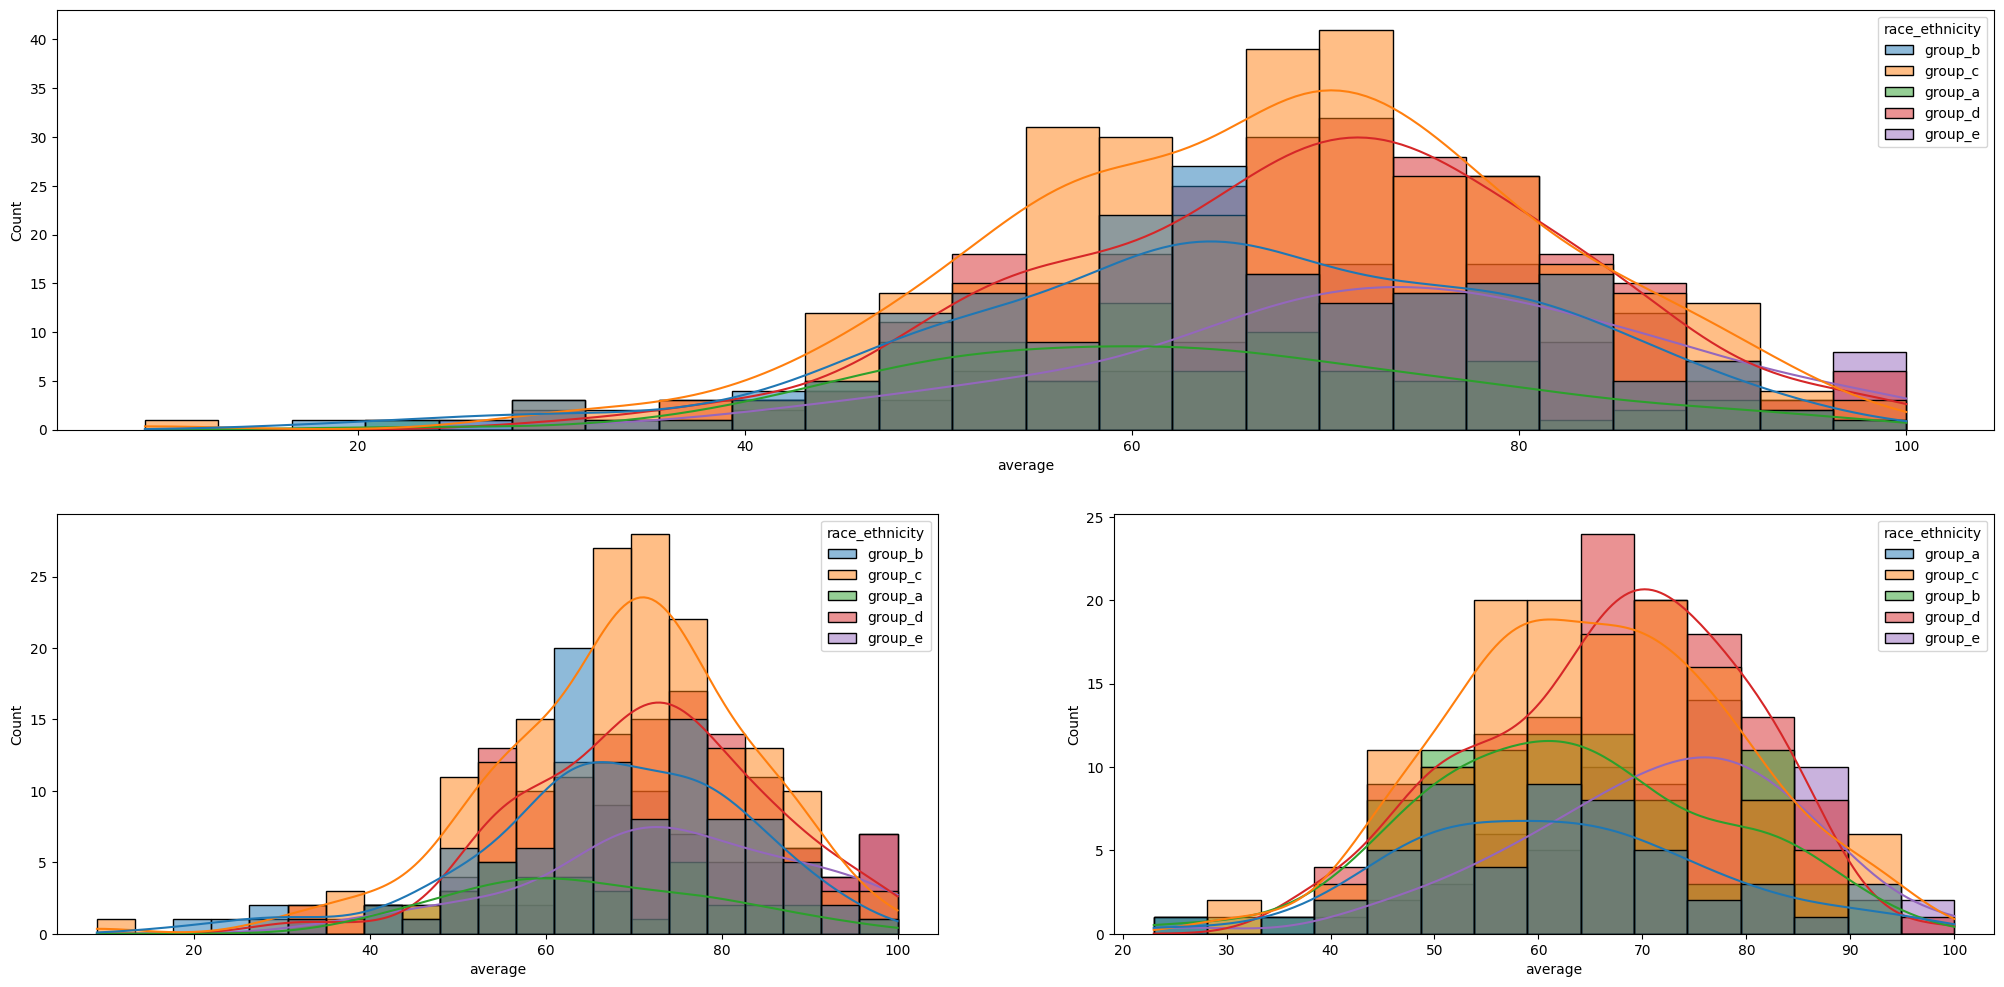

In [475]:
# Average Scores Distribution by Race/Ethnicity and Gender
plt.subplots(2, 2, figsize=(25, 12))

# First subplot: Overall distribution
plt.subplot(211)
ax = sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')

# Second subplot: Female students' distribution
plt.subplot(223)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='race_ethnicity')

# Third subplot: Male students' distribution
plt.subplot(224)
ax = sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')
plt.show()

4.3 Multivariate analysis using pieplot


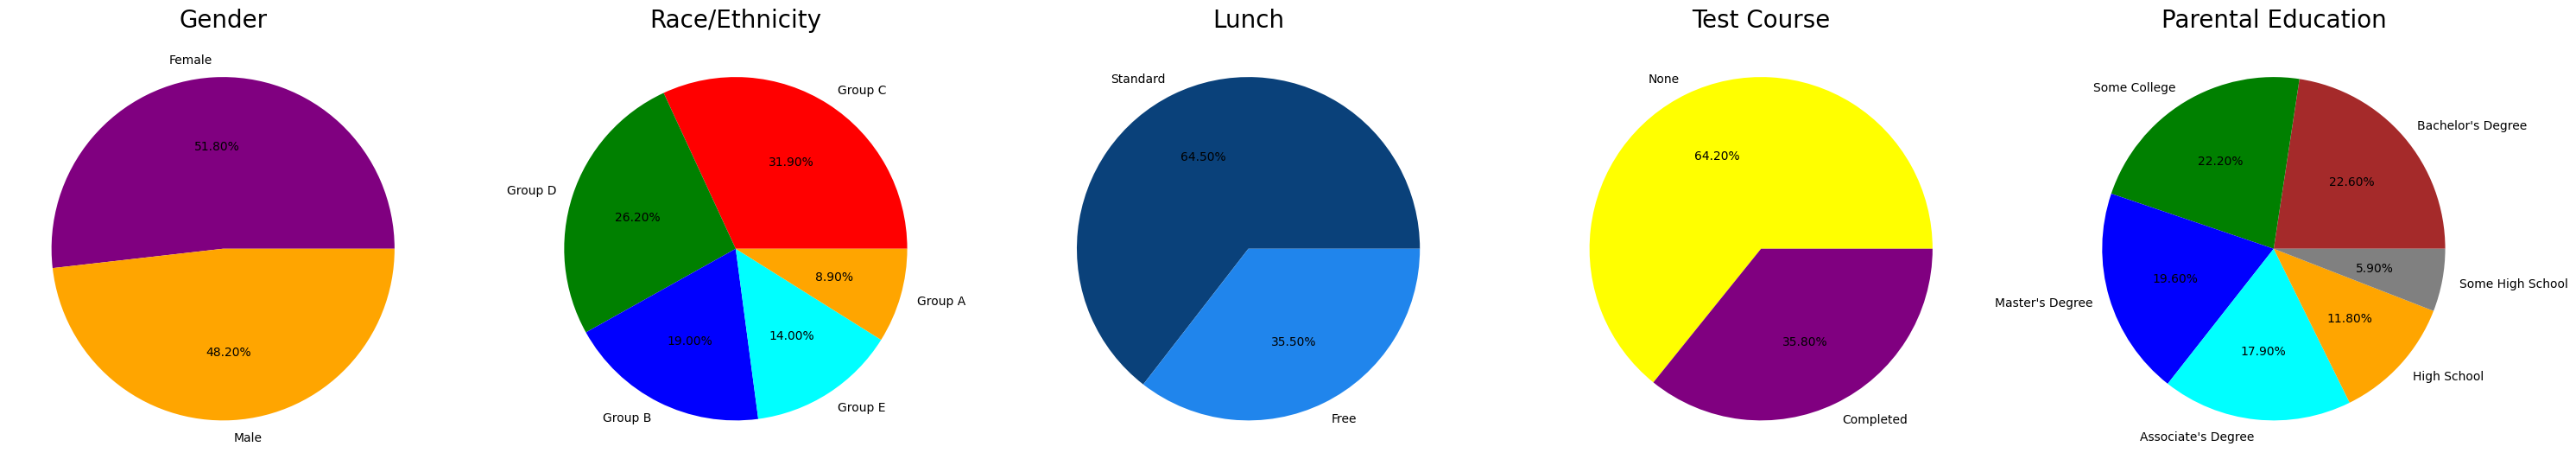

In [476]:

plt.rcParams['figure.figsize'] = (30, 12)

# Define a function to create pie charts
def create_pie_chart(ax, data, labels, title, colors):
    size = data.value_counts()
    ax.pie(size, colors=colors, labels=labels, autopct='%.2f%%')
    ax.set_title(title, fontsize=20)
    ax.axis('off')

# Create subplots
fig, axs = plt.subplots(1, 5)

# Gender Pie Chart
create_pie_chart(axs[0], df['gender'], ['Female', 'Male'], 'Gender', ['purple', 'orange'])

# Race/Ethnicity Pie Chart
create_pie_chart(axs[1], df['race_ethnicity'], ['Group C', 'Group D', 'Group B', 'Group E', 'Group A'],
                 'Race/Ethnicity', ['red', 'green', 'blue', 'cyan', 'orange'])

# Lunch Pie Chart
create_pie_chart(axs[2], df['lunch'], ['Standard', 'Free'], 'Lunch', ['#0a417a', '#2085ec'])

# Test Preparation Course Pie Chart
create_pie_chart(axs[3], df['test_preparation_course'], ['None', 'Completed'], 'Test Course', ['yellow', 'purple'])

# Parental Education Pie Chart
parental_labels = ["Bachelor's Degree", 'Some College', "Master's Degree", "Associate's Degree", 'High School', 'Some High School']
create_pie_chart(axs[4], df['parental_level_of_education'], parental_labels, 'Parental Education',
                 ['brown', 'green', 'blue', 'cyan', 'orange', 'grey'])

plt.tight_layout()
plt.show()


*Insights*
The count of male and female students is nearly equal.
The highest number of students belongs to Group C.
A greater number of students have standard lunch.
A higher number of students haven't enrolled in any test preparation course.
The highest parental education level is "Some College," followed closely by "Associate's Degree."

Feature wise Visualization

Outliers

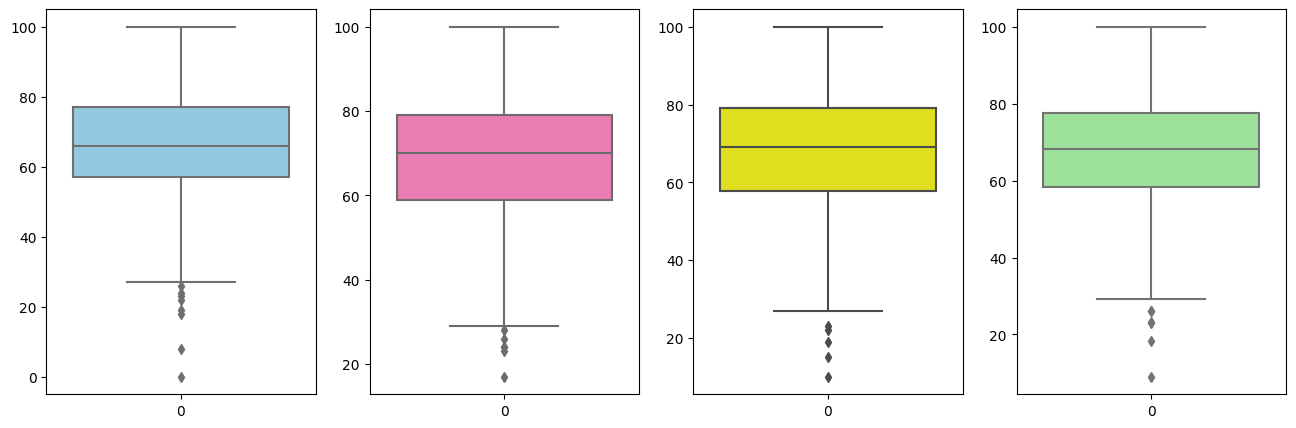

In [477]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

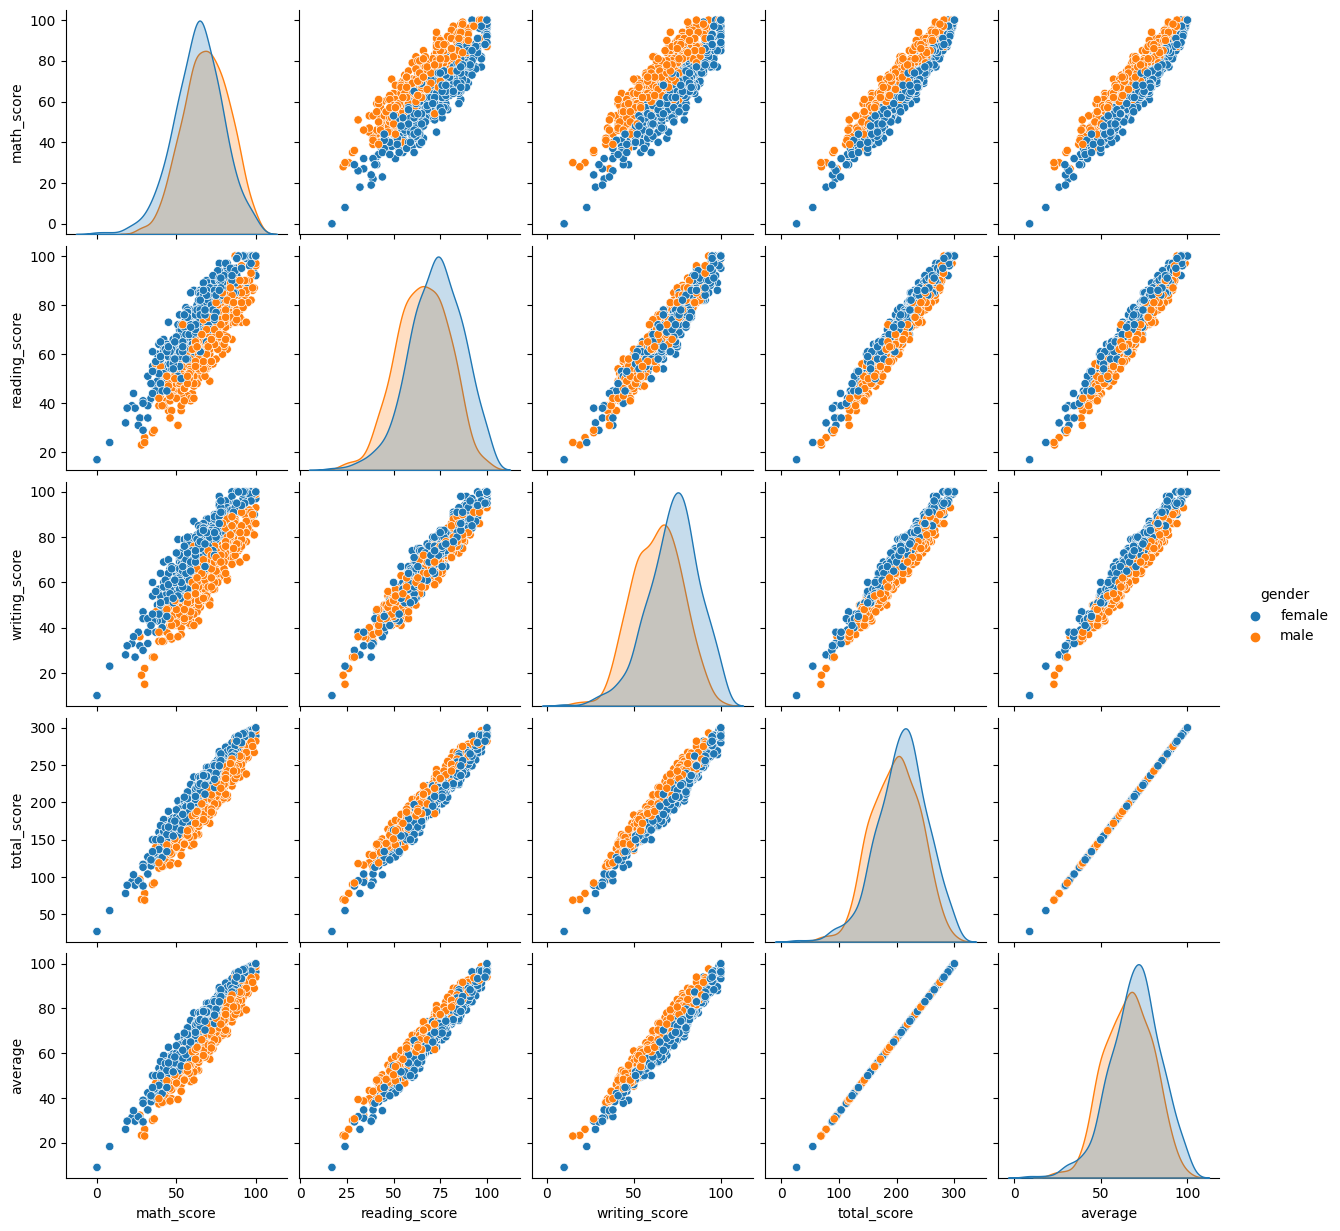

In [478]:
sns.pairplot(df,hue = 'gender')
plt.show()

From the above plot it is clear that all the scores increase linearly with each other.


Model Training

1.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [479]:
!pip install catboost

In [480]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings


from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split


In [481]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group_b,bachelor's_degree,standard,none,72,72,74,218,72.666667
1,female,group_c,some_college,standard,completed,69,90,88,247,82.333333
2,female,group_b,master's_degree,standard,none,90,95,93,278,92.666667
3,male,group_a,associate's_degree,free/reduced,none,47,57,44,148,49.333333
4,male,group_c,some_college,standard,none,76,78,75,229,76.333333


In [482]:
X = df.drop(columns=['math_score', 'total_score', 'average'],axis=1)
X.head(), X.shape

(   gender race_ethnicity parental_level_of_education         lunch  \
 0  female        group_b           bachelor's_degree      standard   
 1  female        group_c                some_college      standard   
 2  female        group_b             master's_degree      standard   
 3    male        group_a          associate's_degree  free/reduced   
 4    male        group_c                some_college      standard   
 
   test_preparation_course  reading_score  writing_score  
 0                    none             72             74  
 1               completed             90             88  
 2                    none             95             93  
 3                    none             57             44  
 4                    none             78             75  ,
 (1000, 7))

In [483]:
y = df['math_score']


In [484]:
y.shape

(1000,)

In [485]:


# Separate features based on data types
numeric_features = X.select_dtypes(exclude="object").columns
categorical_features = X.select_dtypes(include="object").columns

# Define transformers
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, categorical_features),
        ("StandardScaler", numeric_transformer, numeric_features),
    ]
)


In [486]:
X = preprocessor.fit_transform(X)



In [487]:
X.shape

(1000, 19)

Train and test speration

In [488]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

Create an Evaluate Function to give all metrics after model Training


Results

Linear Regression

Plot y_pred and y_test


Difference between Actual and Predicted Values


In [494]:
# prompt: train and tune the performance of the models and select the best model

# Dictionary of regression models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Lists to store model names and R2 scores
model_list = []
r2_list = []

# Loop through each model
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train)  # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Display model performance metrics
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')
# Results
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3231
- Mean Absolute Error: 4.2667
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3940
- Mean Absolute Error: 4.2148
- R2 Score: 0.8804


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7091
- Mean Absolute Error: 4.5175
- R2 Score: 0.8554
-----------------------

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.851589
5,Random Forest Regressor,0.851006
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783497
4,Decision Tree,0.732430



predection of new data

In [495]:
X_train[0]

array([1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 1.        ,
       0.        , 1.        , 0.05694554, 0.45733301])

In [513]:
# prompt: Write code that will predict new data with ridge model and show the prediction

ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
new_data = X_train[2]
new_data
y_pred = ridge_model.predict([new_data])
y_pred


array([76.05938548])

In [510]:
y_train.head()

29     62
535    66
695    79
557    61
836    73
Name: math_score, dtype: int64

Pickling the model

In [516]:
import pickle

In [517]:
pickle.dump(ridge_model, open('ridgemodel.pkl', 'wb'))

In [519]:
pickled_model = pickle.load(open('ridgemodel.pkl', "rb"))

In [521]:
#prediction
pickled_model.predict([X_train[2]])

array([76.05938548])